# TASK 1 : Import Libraries

In [23]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [24]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.13s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from PIL import Image


# TASK 2 : Clone & Explore dataset

In [2]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 32.73 MiB/s, done.
Updating files: 100% (2295/2295), done.


In [3]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')
#directory with the training covid images
train_covid_dir = os.path.join(train_dir,'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir,'NORMAL')
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir,'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [4]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(147).jpg', 'COVID19(236).jpg', 'COVID19(119).jpg', 'COVID19(60).jpg', 'COVID-19 (191).jpg', 'COVID19(77).jpg', 'COVID19(248).jpg', 'COVID19(257).jpg', 'COVID19(440).jpg', 'COVID19(320).jpg']
['NORMAL(777).jpg', 'NORMAL(272).jpg', 'NORMAL(261).jpg', 'NORMAL(908).jpg', 'NORMAL(695).jpg', 'NORMAL(413).jpg', 'NORMAL(147).jpg', 'NORMAL(768).jpg', 'NORMAL(534).jpg', 'NORMAL(664).jpg']
['COVID19(463).jpg', 'COVID-19 (864).jpg', 'COVID19(324).jpg', 'COVID19(100).jpg', 'COVID19(153).jpg', 'COVID19(121).jpg', 'COVID19(34).jpg', 'COVID19(482).jpg', 'COVID19(84).jpg', 'COVID19(278).jpg']
['NORMAL(237).jpg', 'NORMAL(1274).jpg', 'NORMAL(1175).jpg', 'NORMAL(1331).jpg', 'NORMAL(1471).jpg', 'NORMAL(255).jpg', 'NORMAL(61).jpg', 'NORMAL(476).jpg', 'NORMAL(1052).jpg', 'NORMAL(484).jpg']


In [5]:
#print the total no of images present in each dir
print("Total Images present in the taining set: ", len(train_covid_names+train_normal_names))
print("Total Images present in the taining set: ", len(test_covid_names+test_normal_names))

Total Images present in the taining set:  1811
Total Images present in the taining set:  484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(147).jpg', '/content/datasets/Data/train/COVID19/COVID19(236).jpg', '/content/datasets/Data/train/COVID19/COVID19(119).jpg', '/content/datasets/Data/train/COVID19/COVID19(60).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (191).jpg', '/content/datasets/Data/train/COVID19/COVID19(77).jpg', '/content/datasets/Data/train/COVID19/COVID19(248).jpg', '/content/datasets/Data/train/COVID19/COVID19(257).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(777).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(272).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(261).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(908).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(695).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(413).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(147).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(768).jpg']


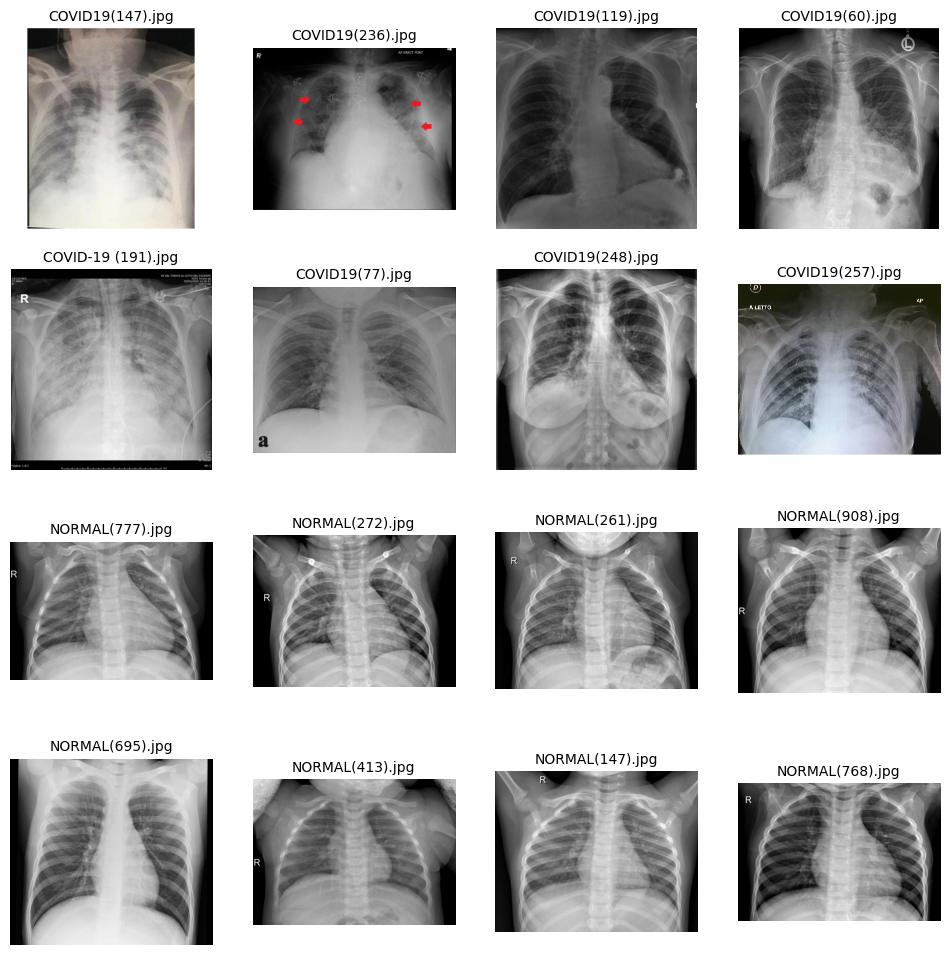

In [6]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i , img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()


# TASK 4 : Data Preprocessing & Augmentation

In [7]:
# generate training,testing and validation batches
dgen_train = ImageDataGenerator(rescale = 1./255,
                               validation_split = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [10]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding ='SAME',activation ='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding ='SAME',activation ='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation = 'relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# TASK 6 : Compile & Train the Model

In [11]:
#compile the model
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
#train the model
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 172s 4s/step - loss: 1.1442 - accuracy: 0.7488 - val_loss: 0.2844 - val_accuracy: 0.8729
Epoch 2/30
46/46 [==============================] - 166s 4s/step - loss: 0.2585 - accuracy: 0.9006 - val_loss: 0.2005 - val_accuracy: 0.9530
Epoch 3/30
46/46 [==============================] - 163s 4s/step - loss: 0.1845 - accuracy: 0.9344 - val_loss: 0.1640 - val_accuracy: 0.9420
Epoch 4/30
46/46 [==============================] - 165s 4s/step - loss: 0.1640 - accuracy: 0.9441 - val_loss: 0.1195 - val_accuracy: 0.9641
Epoch 5/30
46/46 [==============================] - 166s 4s/step - loss: 0.1450 - accuracy: 0.9524 - val_loss: 0.1071 - val_accuracy: 0.9669
Epoch 6/30
46/46 [==============================] - 171s 4s/step - loss: 0.1470 - accuracy: 0.9496 - val_loss: 0.1106 - val_accuracy: 0.9586
Epoch 7/30
46/46 [==============================] - 164s 4s/step - loss: 0.1294 - accuracy: 0.9593 - val_loss: 0.1370 - val_accuracy: 0.9558
Epoch 8/30
46

# TASK 7 : Performance Evaluation

In [13]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

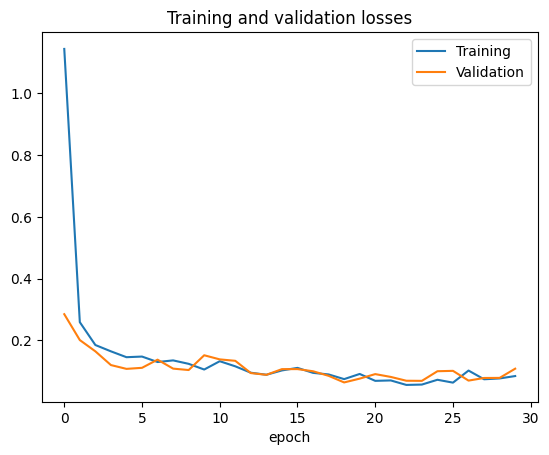

In [14]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

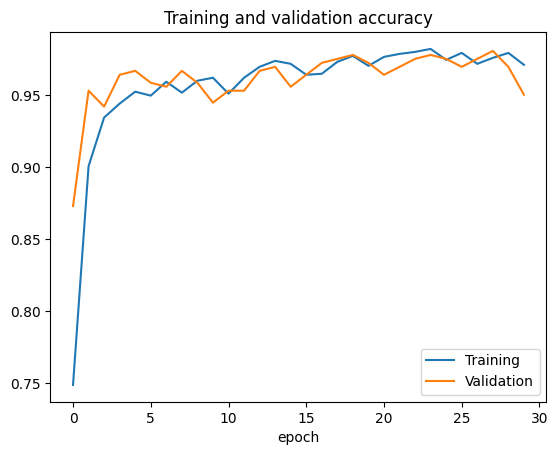

In [15]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [16]:
# get the test acuarcy and loss
test_loss,test_acc = model.evaluate(test_generator)
print("\ntest label : ",test_loss,"\ntest accuracy : ",test_acc)


16/16 [==============================] - 20s 1s/step - loss: 0.1445 - accuracy: 0.9401

test label :  0.14449338614940643 
test accuracy :  0.9400826692581177


# TASK 8 : Prediction On New Data

In [22]:
from PIL import Image
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = image.load_img(img_path,target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis = 0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0:
    print('Covid Detected')
  else:
    print('Your report is Normal')
# Here Upload all 4 files from New data folder

Saving normal2.jpg to normal2.jpg
Saving normal1.jpg to normal1.jpg
Saving covid2.jpeg to covid2.jpeg
Saving covid1.jpg to covid1.jpg
1/1 [==============================] - 0s 250ms/step
normal2.jpg
Your report is Normal
1/1 [==============================] - 0s 98ms/step
normal1.jpg
Your report is Normal
1/1 [==============================] - 0s 78ms/step
covid2.jpeg
Covid Detected
1/1 [==============================] - 0s 81ms/step
covid1.jpg
Covid Detected


In [18]:
!mkdir My_model
model.save('/content/Model/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
from tensorflow import keras
loaded_model = keras.models.load_model('/content/Model/model.h5')

In [28]:
%%writefile app.py
from tensorflow.keras.preprocessing import image
from tensorflow import keras
import numpy as np

import streamlit as st
def main():

    loaded_model = keras.models.load_model('/content/Model/model.h5')
    st.title("Covid19 Detection Using X-Ray Images")
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])
    if uploaded_file is not None:
      # Read the image data
      img_data = uploaded_file.read()
      with open('saved_image.jpg','wb') as f:
        f.write(img_data)
      st.success("Image saved successfully!")
      img = image.load_img('/content/saved_image.jpg',target_size = (150,150))
      images = image.img_to_array(img)
      images = np.expand_dims(images,axis = 0)
      prediction = loaded_model.predict(images)

      if prediction == 0:
        st.write('Covid Detected')
      else:
        st.write('Your report is Normal')

      images = np.array(img)  # Convert to NumPy array
      st.image(images, caption=uploaded_file.name, use_column_width=True)
# Run Streamlit app
if __name__ == "__main__":
    main()


Overwriting app.py


In [31]:
!streamlit run app.py &>/content/logs.txt &
!npx localtunnel --port 8501

npx: installed 22 in 2.304s
your url is: https://poor-coins-doubt.loca.lt
^C
